# Assignment 13 - Preprocessing data for scikit-learn

__This assignment prepares data from the mushroom dataset found at https://archive.ics.uci.edu/ml/datasets/Mushroom to prepare for predictive analysis in project 4.__

__First we look at the data dictionary to see what we're dealing with. We find:__

```
Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

Missing Attribute Values: 2480 of them (denoted by "?"), all for attribute #11.
```

__Armed with this knowledge, we create our Pandas dataframe with a subset of columns - edible/poisonous, odor, and an additional one of our choosing (in this case, ring-number).__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushrooms = pd.read_csv(url, usecols = [0,5,18], names = ['Class', 'Odor', 'RingNumber'])
mushrooms.head()

,Class,Odor,RingNumber
0,p,p,o
1,e,a,o
2,e,l,o
3,p,p,o
4,e,n,o


__Next, we replace the codes in the columns with numeric values.__

In [2]:
mushrooms['Class'].replace({'p': 1,'e': 0}, inplace = True)
mushrooms['Odor'].replace(
    {'a':0,'l':1,'c':2,'y':3,'f':4,'m':5,'n':6,'p':7,'s':8}, inplace = True)
mushrooms['RingNumber'].replace({'n':0, 'o':1, 't': 2}, inplace = True)
mushrooms.head()

,Class,Odor,RingNumber
0,1,7,1
1,0,0,1
2,0,1,1
3,1,7,1
4,0,6,1


__Next, we show distribution data for each of the columns.__

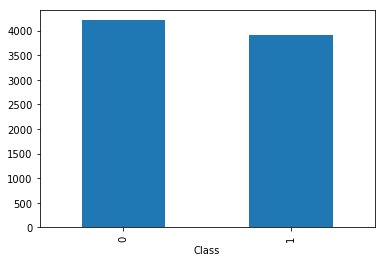

In [3]:
mushrooms.groupby('Class')['Class'].count().plot.bar()

__This shows that the mushroom data is almost evenly distributed between edible (value = 0) and poisonous (value = 1).__

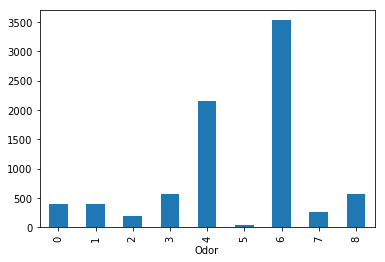

In [4]:
mushrooms.groupby('Odor')['Odor'].count().plot.bar()

__We see that 4 ('foul') and 6 ('none') are the most common odors.__

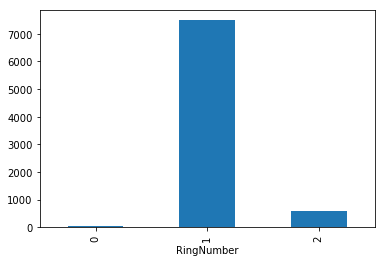

In [5]:
mushrooms.groupby('RingNumber')['RingNumber'].count().plot.bar()

__Most of the mushrooms in the dataset have only one ring.__

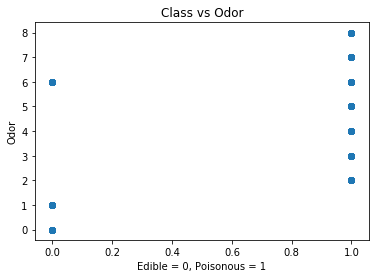

In [6]:
plt.scatter(mushrooms.Class, mushrooms.Odor)
plt.title('Class vs Odor')
plt.xlabel('Edible = 0, Poisonous = 1')
plt.ylabel('Odor')

__We see that odors 2 through 6 are associated with being poisonous, while odor 6 ('none') might be edible or poisonous.  Odors 0 and 1 ('almond' and 'anise') are associated with being edible.__

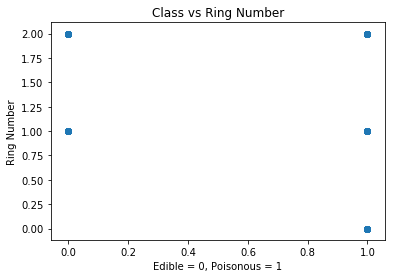

In [7]:
plt.scatter(mushrooms.Class, mushrooms.RingNumber)
plt.title('Class vs Ring Number')
plt.xlabel('Edible = 0, Poisonous = 1')
plt.ylabel('Ring Number')

__We see that one or two rings can be either edible or poisonous, but no rings indicates a poisonous mushroom.__